In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from utils import load_data, preprocess_players, preprocess_teams
import warnings
warnings.filterwarnings('ignore')

## Load data and preprocess

In [2]:
Data_player, Data_team = {},{}
for season in range(2013,2021):
    data_espn, data_dd, data_hollinger = load_data(season)
    data_player = preprocess_players(data_espn, data_dd, data_hollinger)
    data_espn, _, _ = load_data(season)
    data_team = preprocess_teams(data_espn)
    Data_player[f"{season-1}-{season}"] = data_player
    Data_team[f"{season-1}-{season}"] = data_team

## Exploratory Data Analysis
### Average league statistics over years

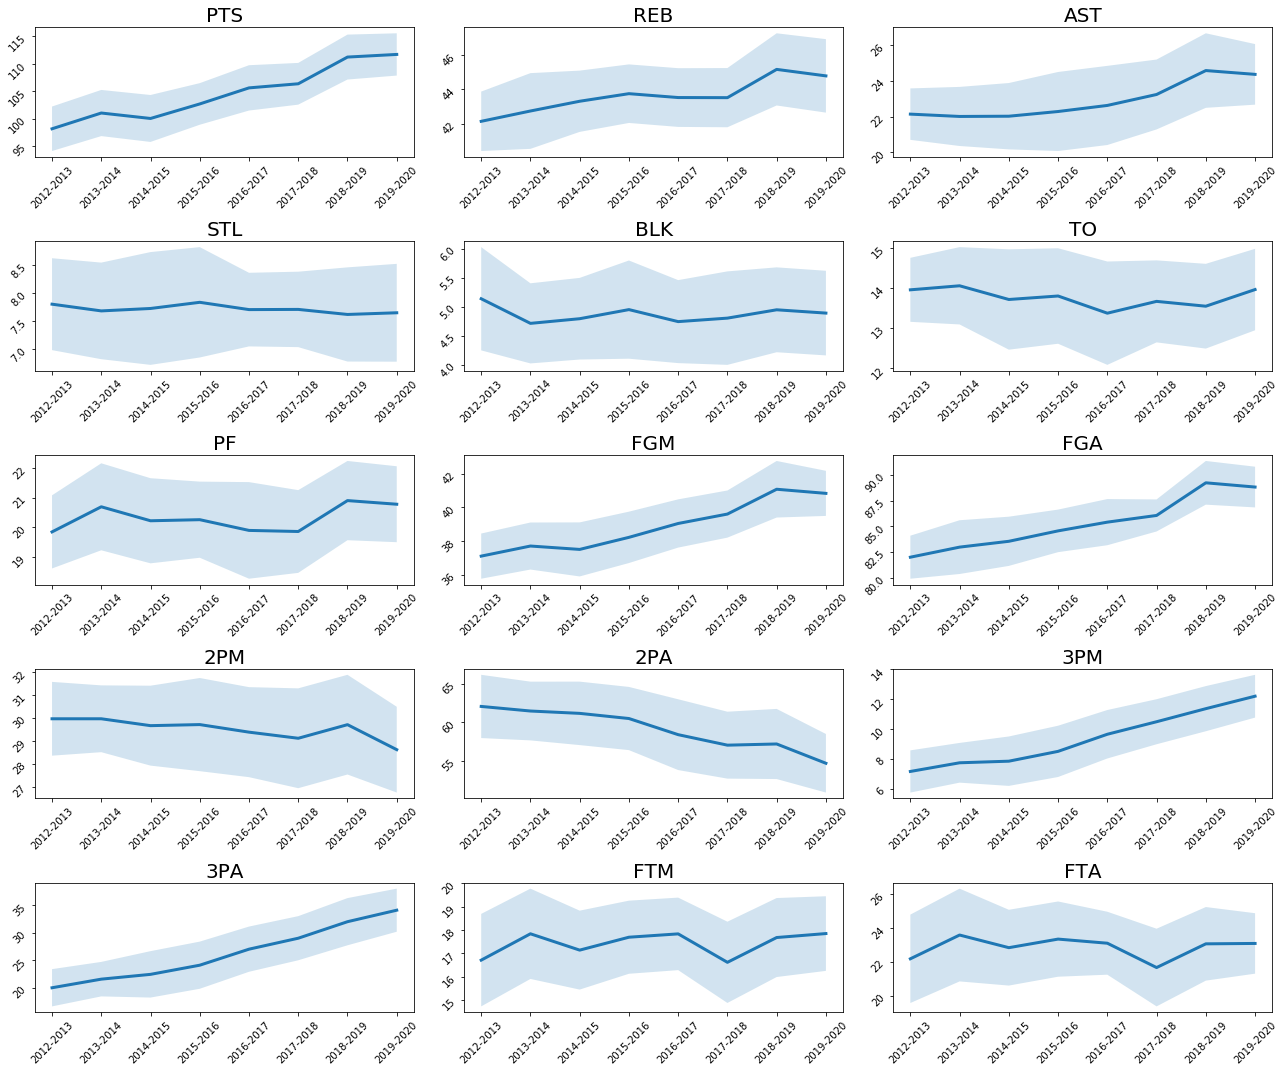

In [5]:
catg = ['PTS','REB','AST','STL','BLK','TO','PF','FGM','FGA','2PM','2PA','3PM','3PA','FTM','FTA']
fig, axes = plt.subplots(5, 3, figsize=(18, 15))
x = [f"{season-1}-{season}" for season in range(2013,2021)]
for row in range(5):
    for i in range(3):
        idx = i + row*3
        y = np.array([Data_team[f"{season-1}-{season}"].describe()[catg[idx]][1] for season in range(2013,2021)])
        std = np.array([Data_team[f"{season-1}-{season}"].describe()[catg[idx]][2] for season in range(2013,2021)])
        axes[row][i].plot(x, y, lw=3)
        axes[row][i].fill_between(x, y-std, y+std, alpha=0.2)
        axes[row][i].tick_params(labelrotation=45)
        axes[row][i].set_title(catg[idx], fontsize=20)
plt.tight_layout()

### Player statistics within one season
- with a focus on players played at least 20 games and 15 min per game

In [6]:
season = 2020 # for (season-1)-season
Data = Data_player[f"{season-1}-{season}"]
Data_small = Data[(Data['GP']>=20) & (Data['MIN']>=15)]
# feature of interest
feature = ['Name', 'Pos', 'GP', 'MIN', 'PTS', 'REB', 'AST', 'STL', 'BLK', 
           'TO', 'FGM', 'FGA', 'FTM', 'FTA', '3PM', '3PA', '2PM', '2PA']

- player counts

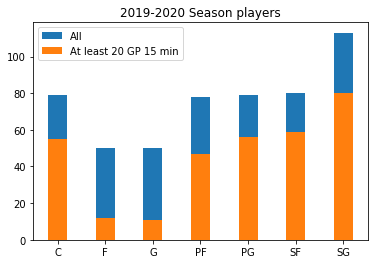

In [7]:
pos = Data.groupby(['Pos']).count().transpose()[:1].columns
pos_count = Data.groupby(['Pos']).count().transpose()[:1].values[0]
plt.bar(pos, pos_count, width = 0.4, label="All")

pos = Data_small.groupby(['Pos']).count().transpose()[:1].columns
pos_count = Data_small.groupby(['Pos']).count().transpose()[:1].values[0]
plt.bar(pos, pos_count, width = 0.4, label="At least 20 GP 15 min")

plt.legend()
plt.title(f"{season-1}-{season} Season players");

- statistics per game

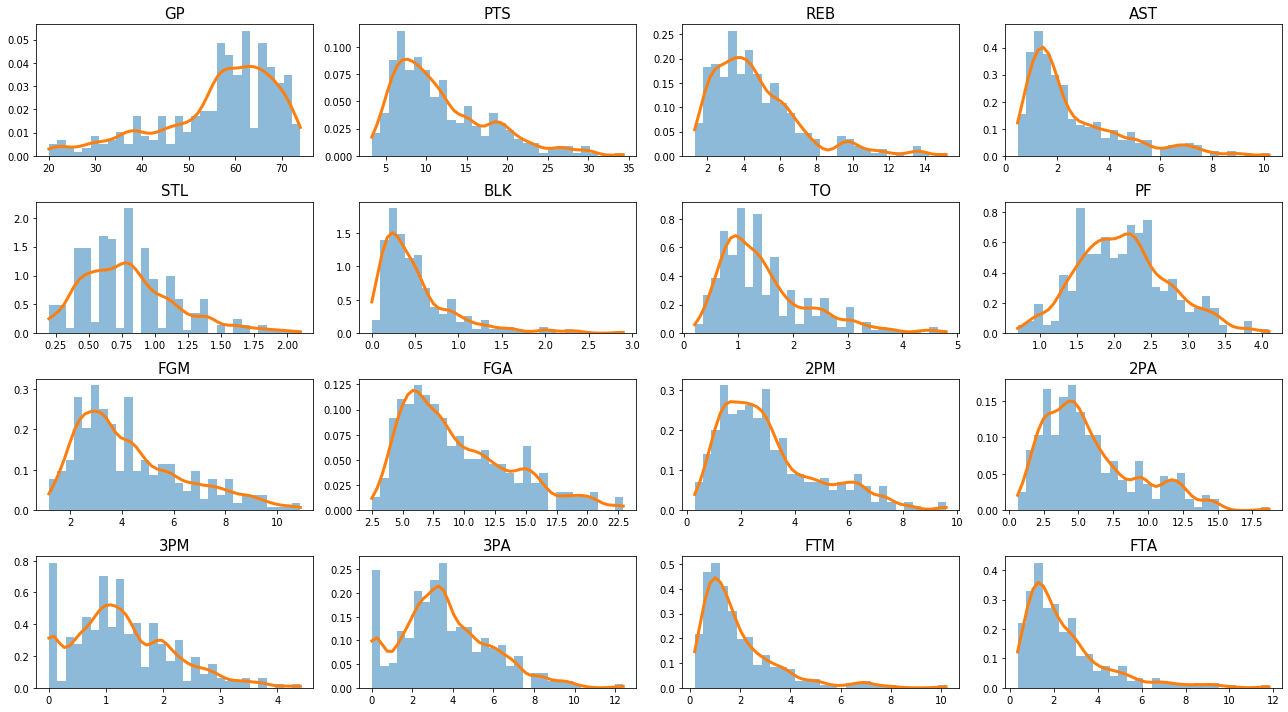

In [53]:
catg = ['GP','PTS','REB','AST','STL','BLK','TO','PF','FGM','FGA','2PM','2PA','3PM','3PA','FTM','FTA']
fig, axes = plt.subplots(4, 4, figsize=(18, 10))
for row in range(4):
    for i in range(4):
        idx = i + row*4
        temp = Data_small[catg[idx]]
        axes[row][i].hist(temp, bins=30, alpha = 0.5, density=True)
        kde = KernelDensity(kernel='gaussian', bandwidth=max(temp)/30).fit(np.array(temp).reshape(-1,1))
        s = np.linspace(min(temp),max(temp))
        log_dens = kde.score_samples(s.reshape(-1,1))
        axes[row][i].plot(s, np.exp(log_dens), lw=3)
        axes[row][i].set_title(catg[idx], fontsize=15)
plt.tight_layout()

- statistics total

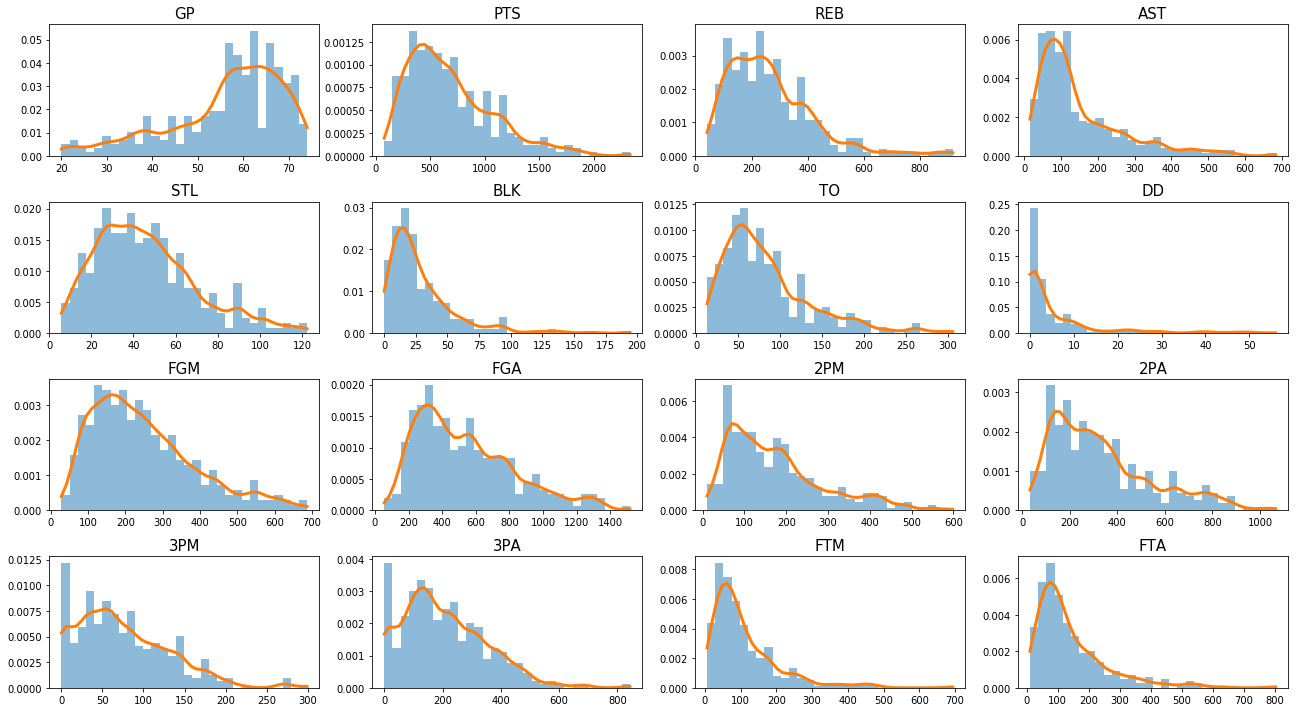

In [54]:
catg = ['GP','PTS','REB','AST','STL','BLK','TO','DD','FGM','FGA','2PM','2PA','3PM','3PA','FTM','FTA']
fig, axes = plt.subplots(4, 4, figsize=(18, 10))
for row in range(4):
    for i in range(4):
        idx = i + row*4
        if catg[idx] in ['GP', 'DD']:
            temp = Data_small[catg[idx]]
        else:
            temp = Data_small[catg[idx]] * Data_small['GP']
        axes[row][i].hist(temp, bins=30, alpha = 0.5, density=True)
        kde = KernelDensity(kernel='gaussian', bandwidth=max(temp)/30).fit(np.array(temp).reshape(-1,1))
        s = np.linspace(min(temp),max(temp))
        log_dens = kde.score_samples(s.reshape(-1,1))
        axes[row][i].plot(s, np.exp(log_dens), lw=3)
        axes[row][i].set_title(catg[idx], fontsize=15)
plt.tight_layout()

- shooting stats per game

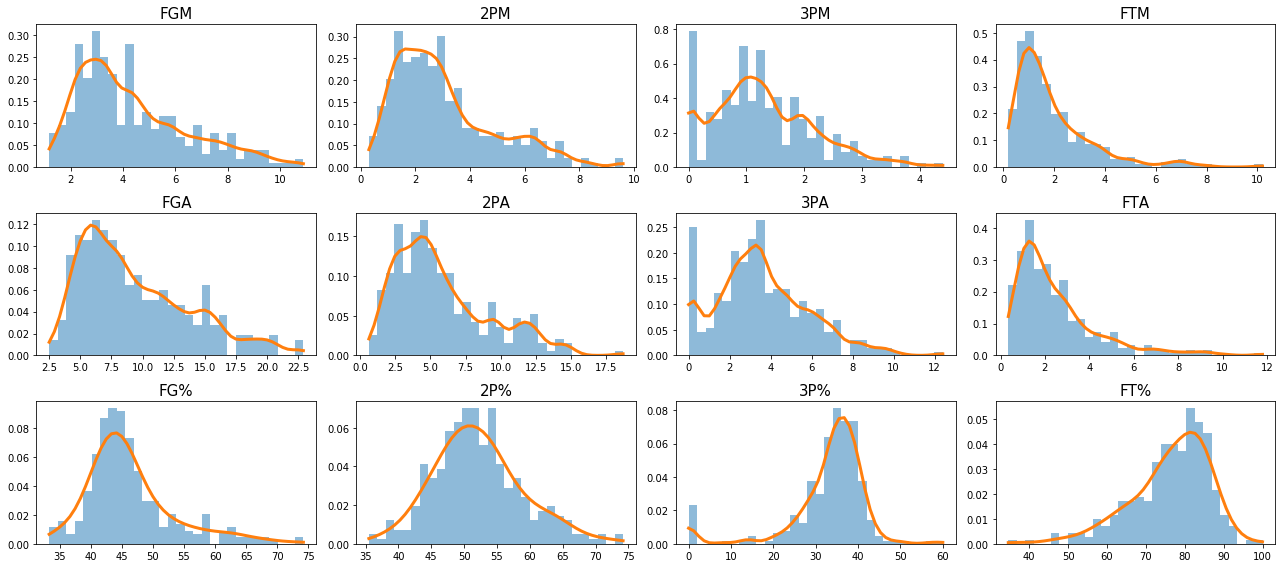

In [55]:
catg = ['FGM','2PM','3PM','FTM','FGA','2PA','3PA','FTA','FG%','2P%','3P%','FT%']
fig, axes = plt.subplots(3, 4, figsize=(18, 8))
for row in range(3):
    for i in range(4):
        idx = i + row*4
        temp = Data_small[catg[idx]]
        axes[row][i].hist(temp, bins=30, alpha = 0.5, density=True)
        kde = KernelDensity(kernel='gaussian', bandwidth=max(temp)/30).fit(np.array(temp).reshape(-1,1))
        s = np.linspace(min(temp),max(temp))
        log_dens = kde.score_samples(s.reshape(-1,1))
        axes[row][i].plot(s, np.exp(log_dens), lw=3)
        axes[row][i].set_title(catg[idx], fontsize=15)
plt.tight_layout()